In [6]:
import networkx as nx 
import matplotlib.pyplot as plt 
def create_cycle(num):
    """
    Return networkx cycle  with a specifed number of vertices

    Args:
        num: number of vertices

    Returns:
        A networkx graph of a cycle with num vertices.
    """
    network = nx.Graph() # Creating the graph and adding nodes
    nodes = range(num) # Creating list of number labels for each node
    network.add_nodes_from(nodes) # Creating nodes
    nx.add_cycle(network, nx.nodes(network)) # Adding edges to make a cycle out of all nodes in the network
    return nx.Graph(network)


In [7]:
def label_cycles_greedy(network):
    """
    Greedy algorithm for L(2,1) labeling any cycle graph

    Args:
        tree: a networkx full cycle graph 

    Returns:
        A dictionary of labels for every node of the cycle provided
    """
    node_list = list(nx.nodes(network)) # A list of numbers with each number representing a node
    # Creates a dictionary with the keys being the nodes number and the value the frequency assigned to the node
    label_list = dict.fromkeys(node_list)
    for i in node_list: # Iterate through each node in the in the graph
        neighbors_list = list(nx.all_neighbors(network, i)) # Find all the neighbors to the node
        bad_list=[] # Initialize list of frequency the node can not be
        for k in neighbors_list: # Iterates through the adjacent nodes
            if label_list[k] is not None: # If the adjacent nodes are assigned a frequency add frequencies to bad frequencies
                bad_list.append(label_list[k]) # The original node cannot be the same as the adjunct
                bad_list.append(label_list[k]+1) # The original node cannot be one frequency away above from the adjacent nodes frequency
                bad_list.append(label_list[k]-1) # The original node cannot be one frequency away below from the adjacent nodes frequency
            secondary_neighbor = list(nx.all_neighbors(network, k)) # List of nodes that are adjacent to the adjacent node
            for j in secondary_neighbor: # Iterate through adjacent to adjacent nodes
                if label_list[j] is not None: #If the adjacent to adjacent node exists add it to the bad frequencies
                    bad_list.append(label_list[j])  # The original node cannot be the same as the adjacent to adjacent node
        if bad_list == []: # If there are no adjacent or adjacent to adjacent nodes set the frequency to 0
            label_list[i]=0 # Set the nodes frequency to 0
        else:
            possible_color=range(0,max(bad_list)+2) # List of possible frequencies to choose from, 0 to highest frequency plus 1
            label_list[i]= [x for x in possible_color if x not in bad_list][0] # Find the lowest possible frequency that is not in the bad list and can be used
    return label_list

[0, 2, 4, 0, 2, 4, 1, 3]
The span is: 5


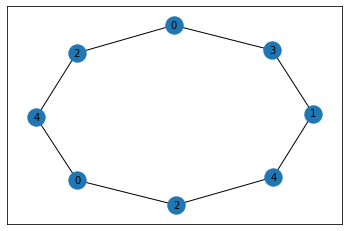

In [14]:
number_of_nodes=8 # Number of nodes in Cycle
network = create_cycle(number_of_nodes) # Create Cycle
label_list = label_cycles_greedy(network) # Call Labeling function
frequencies_list = list(label_list.values()) # list of the frequencies assigned to nodes
print(frequencies_list) # Print out list
pos = nx.spring_layout(network) # Create NetworkX layout
nx.draw_networkx(network,pos,with_labels=False) # Create NetworkX graph visual
nx.draw_networkx_labels(network, pos, label_list, font_size=10) # Create frequency labels NetworkX graph visual
span=max(frequencies_list)-min(frequencies_list)+1 #The span of frequencies used including 0
print("The span is:", span) # Print span

In [9]:
def label_cycles_algorithm(network):
    """
    Pattern algorithm for L(2,1) labeling any cycle graph

    Args:
        tree: a networkx full cycle graph 

    Returns:
        A dictionary of labels for every node of the cycle provided
    """
    node_list = list(nx.nodes(network))# A list of numbers with each number representing a node
    # Creates a dictionary with the keys being the nodes number and the value of the frequency assigned to the node
    label_list = dict.fromkeys(node_list)
    labels=[] # List of frequency labels for nodes
    if number_of_nodes>=5: # If the number of nodes is great or equal to five
        number_of_threes=int(number_of_nodes/3) # The number of nodes divided by 3 with no remainder
        for i in range(number_of_threes): # Adds three labels for each 3 that can be divided into the number of nodes
            labels=labels+[0,2,4] # Adds the numbers 0, 2, and 4 in that order to the list of frequency labels
            print("Add 0, 2, 4") # Prints the numbers added
        remander=number_of_nodes%3 # Finds the remainder of the number of nodes divided by 3
        if remander==1: # If the remander is 1
            # Removes the last three labels 0, 2, and 4 from the list
            # replaces them with 0, 3, 1, and 4
            labels=labels[:-3]+[0,3,1,4]
            print("Delete 0, 2, 4") # Prints numbers deleted
            print("Add 0, 3, 1, 4") # Prints numbers added
        elif remander==2: # If the remander is 2
            labels=labels+[1,3] # Adds the numbers 1 and 3 in that order to the list of frequency labels.
            print("Add 1, 3") # Prints numbers added
    for i in range(number_of_nodes): # converts labels into a dictionary
        label_list[i]=labels[i]
    return label_list

Add 0, 2, 4
Add 0, 2, 4
Delete 0, 2, 4
Add 0, 3, 1, 4
[0, 2, 4, 0, 3, 1, 4]
[0, 2, 4, 0, 3, 1, 4]
The span is: 5


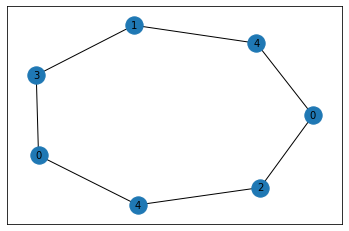

In [15]:
number_of_nodes=7 # Number of nodes in Cycle
network = create_cycle(number_of_nodes) # Create Cycle
label_list = label_cycles_algorithm(network) # Call Labeling function
frequencies_list = list(label_list.values()) # list of the frequencies assigned to nodes
print(frequencies_list) # Print out list
pos = nx.spring_layout(network) # Create NetworkX layout
nx.draw_networkx(network,pos,with_labels=False) # Create NetworkX graph visual
nx.draw_networkx_labels(network, pos, label_list, font_size=10) # Create frequency labels NetworkX graph visual
span=max(frequencies_list)-min(frequencies_list)+1 #The span of frequencies used including 0
print("The span is:", span) # Print span